<a href="https://colab.research.google.com/github/sttutie/Jungho-Shin/blob/main/%EC%9C%84%EC%A1%B0%EC%A7%80%ED%8F%90_Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
from google.colab import files
import numpy as np

In [39]:
df = pd.read_csv( "https://raw.githubusercontent.com/sttutie/Jungho-Shin/main/fake_bills.csv", sep=';')

In [40]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [41]:
df.tail()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25
1499,False,171.47,104.15,103.82,4.63,3.37,112.07


In [42]:
df.groupby('is_genuine').count()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,500,500,500,492,500,500
True,1000,1000,1000,971,1000,1000


In [43]:
import missingno as msno

<Axes: >

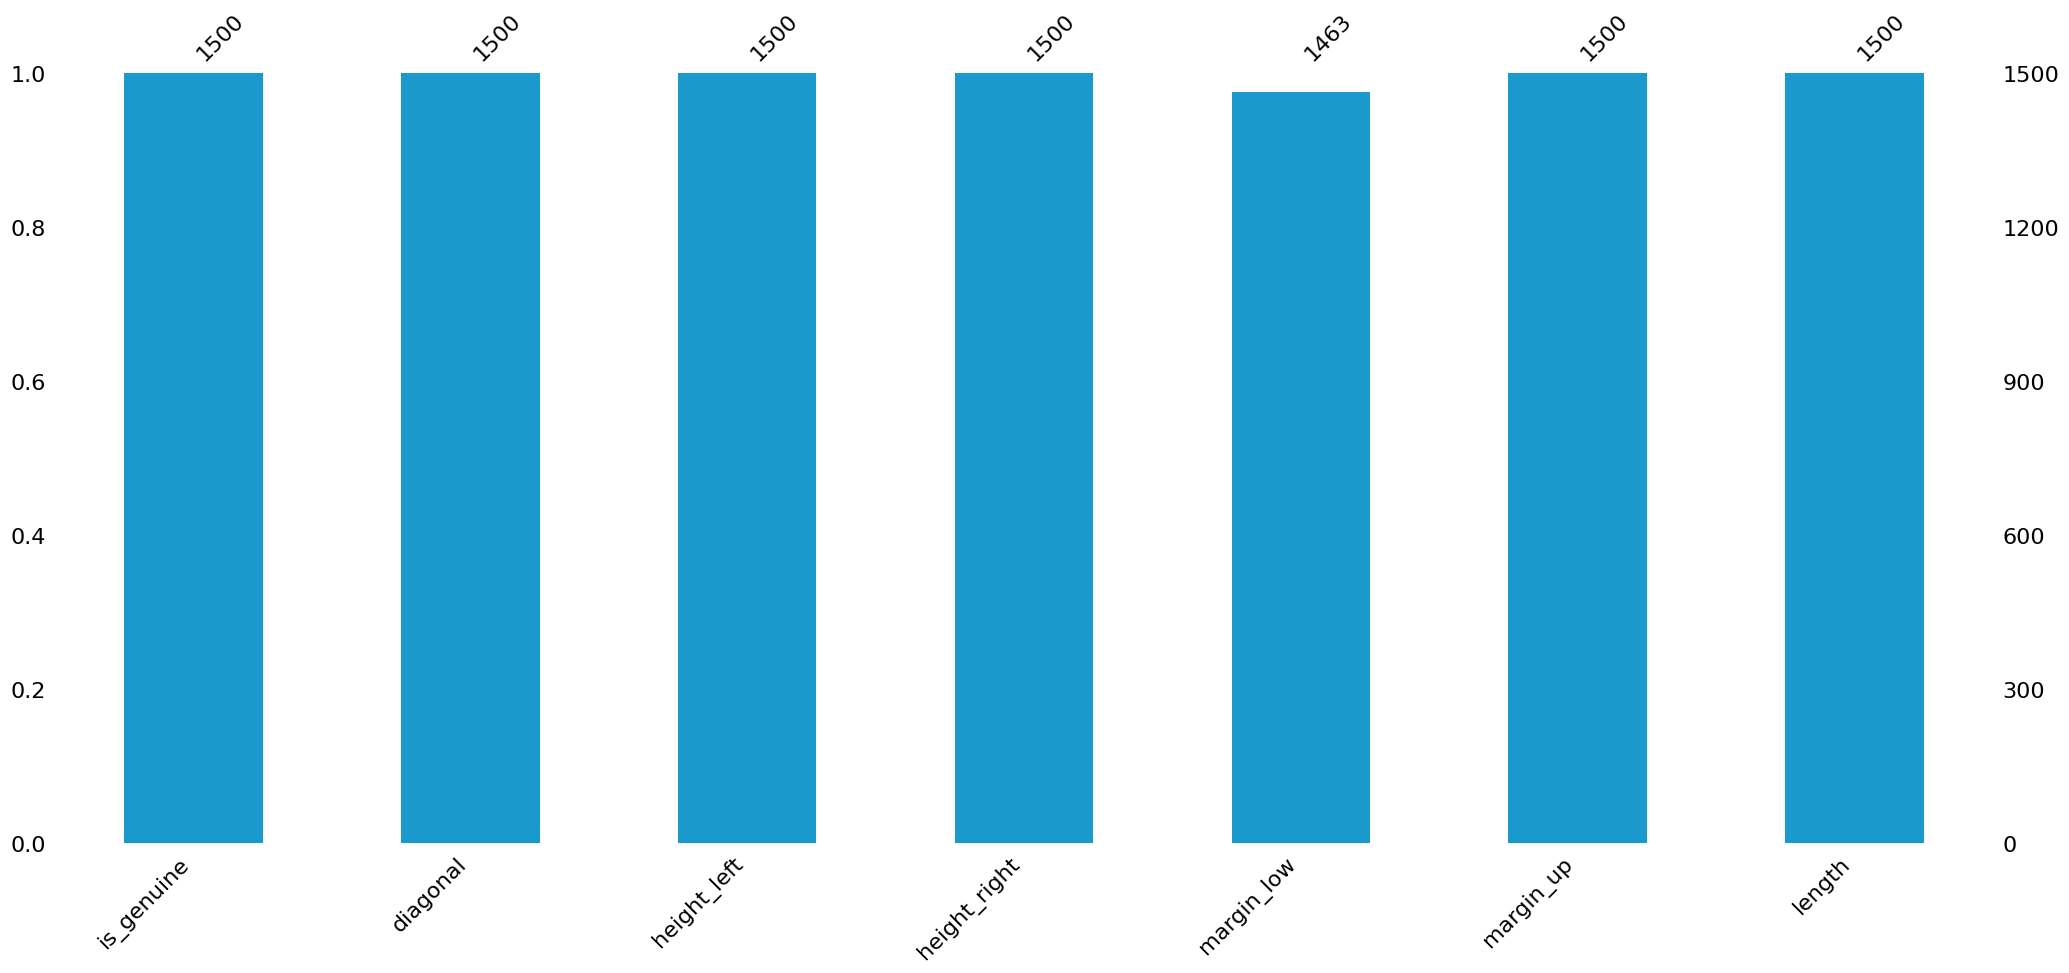

In [44]:
msno.bar(df, color=(0.1, 0.6, 0.8))

<Axes: >

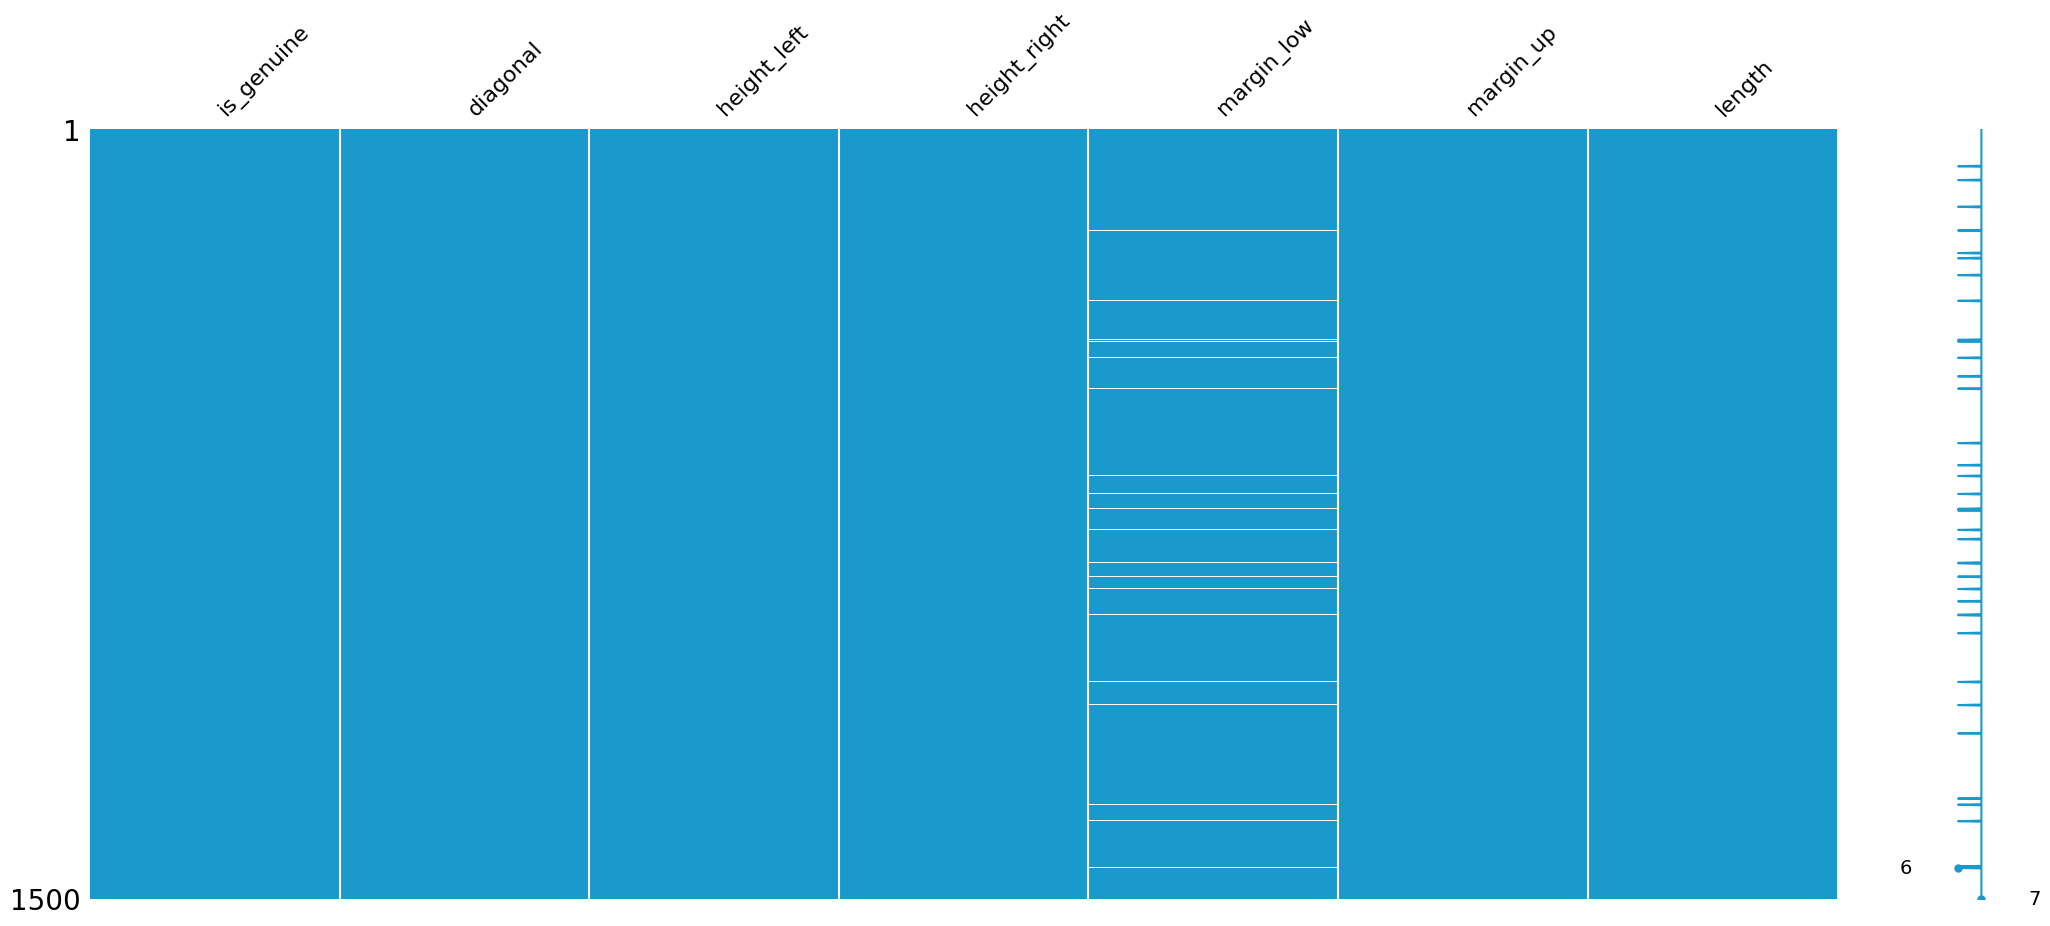

In [45]:
msno.matrix(df, color=(0.1, 0.6, 0.8))

In [46]:
from sklearn.impute import KNNImputer

In [47]:
imputer=KNNImputer(n_neighbors=5)

In [48]:
filled_train=imputer.fit_transform(df)

In [49]:
filled_train=pd.DataFrame(filled_train, columns=df.columns)

<Axes: >

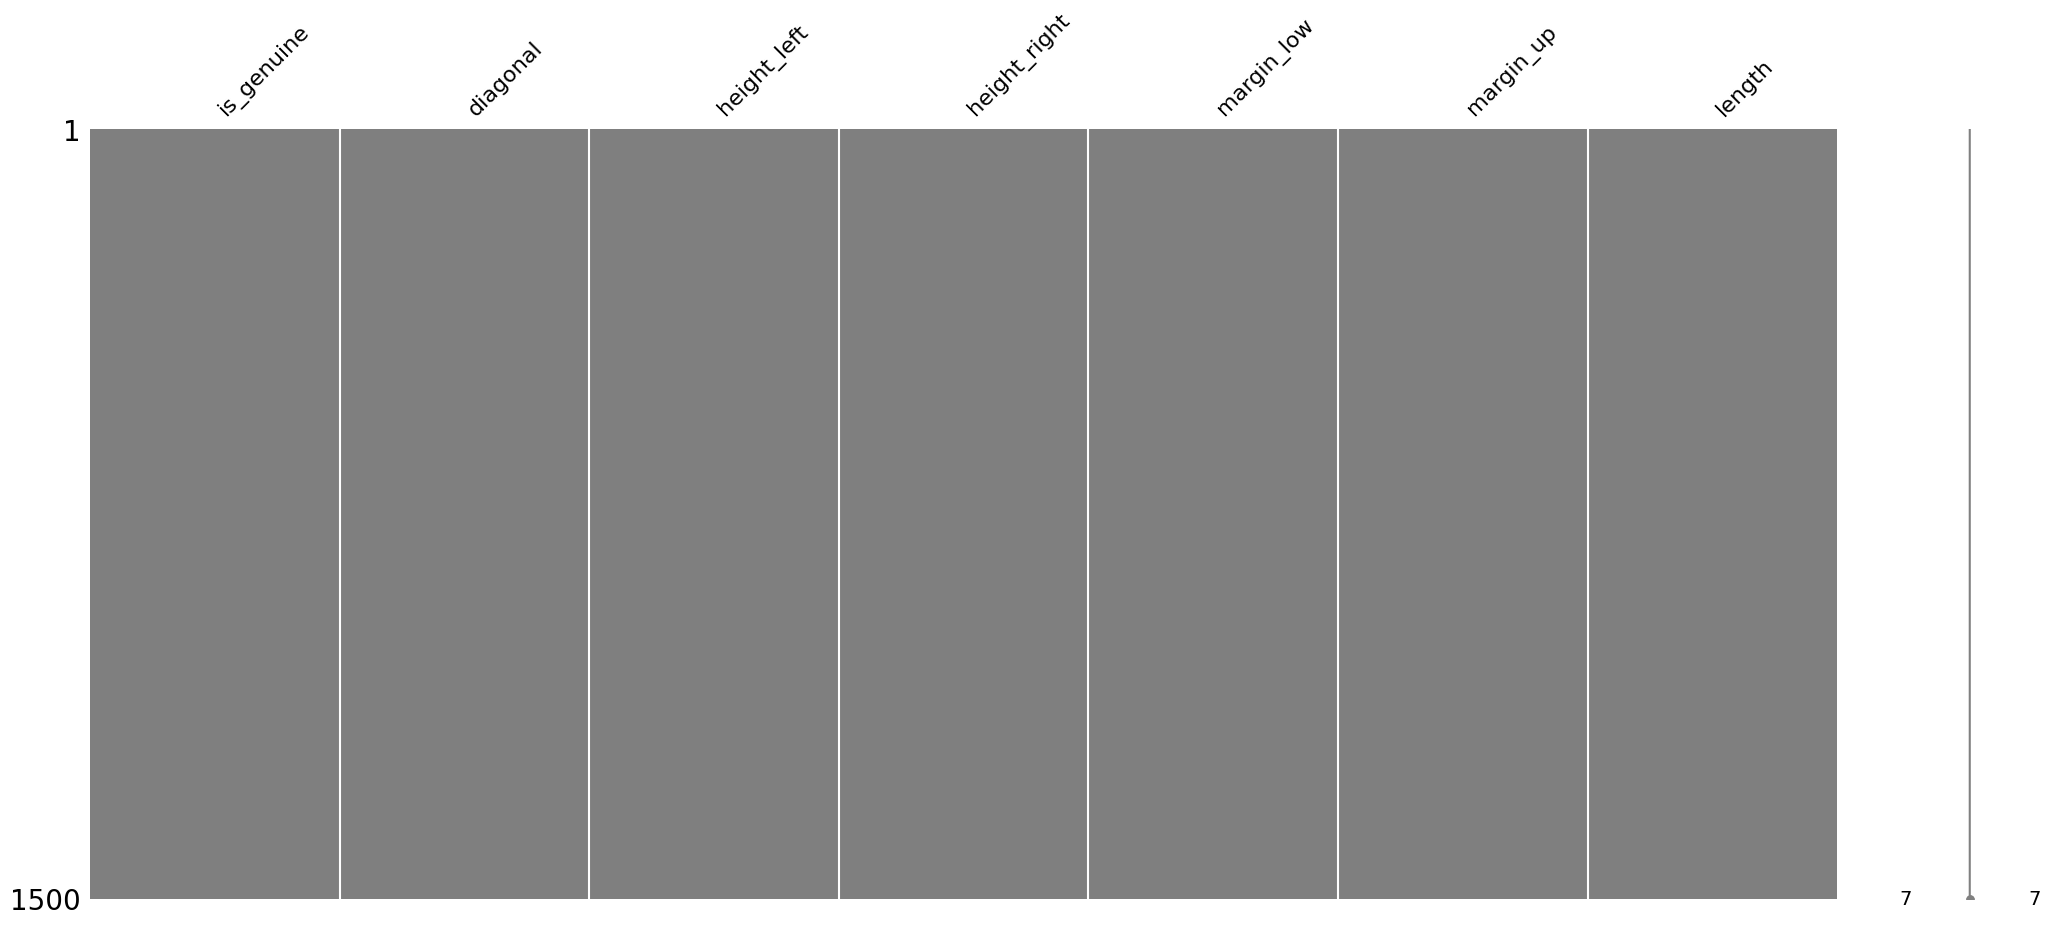

In [50]:
msno.matrix(filled_train, color=(0.5, 0.5, 0.5))


In [51]:
filled_train['is_genuine'] =filled_train['is_genuine'].apply(lambda x : 0 if x ==0 else 1)

In [52]:
one_hot_encoded_data = pd.get_dummies(filled_train, columns=['is_genuine'])

In [53]:
print(one_hot_encoded_data)

      diagonal  height_left  height_right  margin_low  margin_up  length  \
0       171.81       104.86        104.95        4.52       2.89  112.83   
1       171.46       103.36        103.66        3.77       2.99  113.09   
2       172.69       104.48        103.50        4.40       2.94  113.16   
3       171.36       103.91        103.94        3.62       3.01  113.51   
4       171.73       104.28        103.46        4.04       3.48  112.54   
...        ...          ...           ...         ...        ...     ...   
1495    171.75       104.38        104.17        4.42       3.09  111.28   
1496    172.19       104.63        104.44        5.27       3.37  110.97   
1497    171.80       104.01        104.12        5.51       3.36  111.95   
1498    172.06       104.28        104.06        5.17       3.46  112.25   
1499    171.47       104.15        103.82        4.63       3.37  112.07   

      is_genuine_0  is_genuine_1  
0                0             1  
1                

In [54]:
X = one_hot_encoded_data.drop(["is_genuine_0", "is_genuine_1"], axis=1)  # is_genuine 열 제외
y = one_hot_encoded_data[["is_genuine_0", "is_genuine_1"]]

In [55]:
import seaborn as sns

In [56]:
from sklearn.model_selection  import train_test_split

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3 , stratify =y, random_state=0)

In [59]:
print(y_test)

      is_genuine_0  is_genuine_1
1328             1             0
168              0             1
1060             1             0
1272             1             0
347              0             1
...            ...           ...
778              0             1
84               0             1
1321             1             0
176              0             1
833              0             1

[450 rows x 2 columns]


In [60]:
df_cat = pd.concat([X_train,y_train], axis=1)
df_cat.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine_0,is_genuine_1
391,171.55,103.68,104.27,4.08,2.84,112.95,0,1
1007,171.83,104.13,104.52,4.94,3.27,111.72,1,0
1056,171.50,104.32,104.66,4.92,3.33,111.95,1,0
1133,171.79,103.99,103.67,6.16,3.52,110.93,1,0
519,172.13,103.76,103.33,4.37,3.48,113.34,0,1


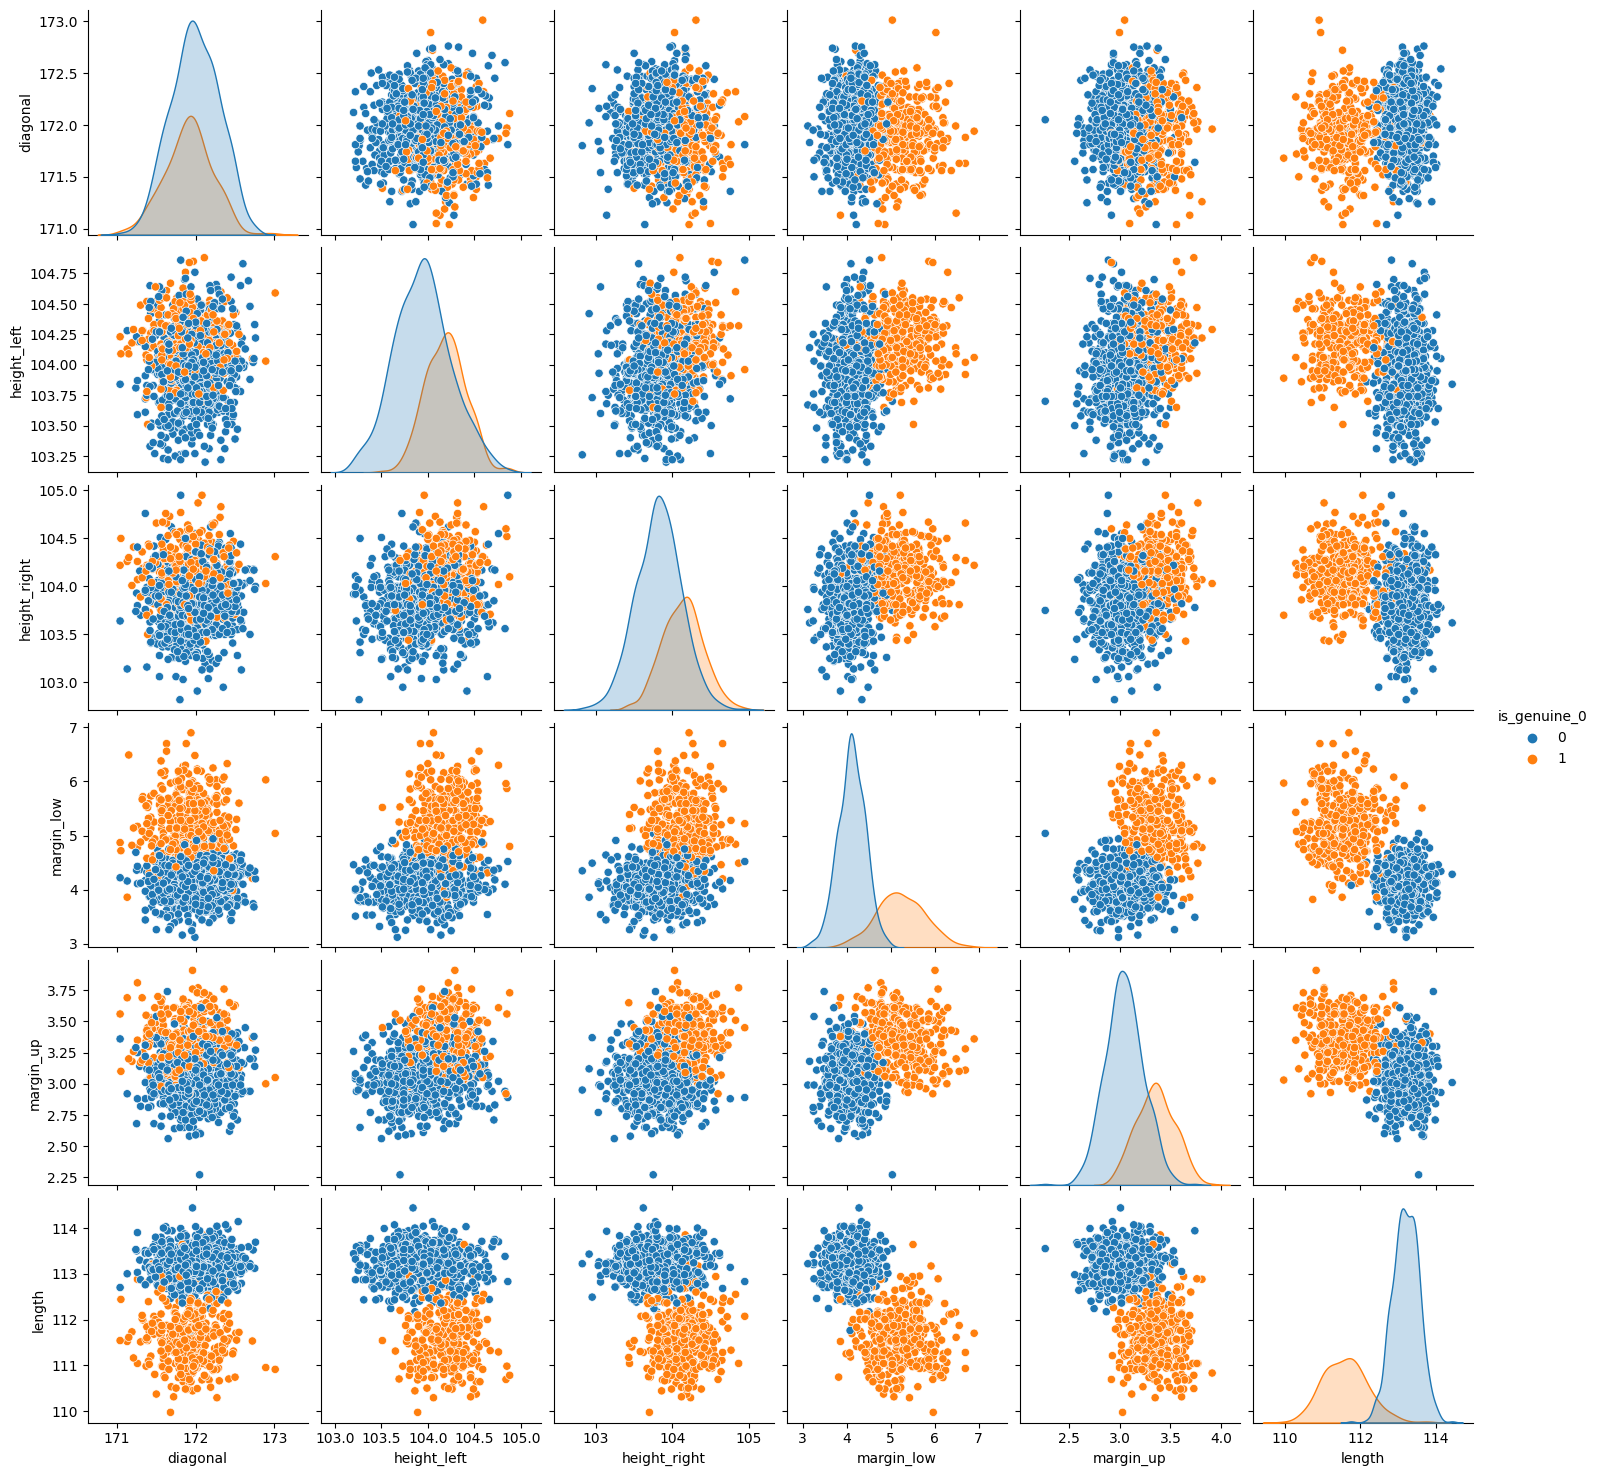

In [61]:
sns.pairplot(df_cat.iloc[:,0:7], hue='is_genuine_0'); 
plt.show()

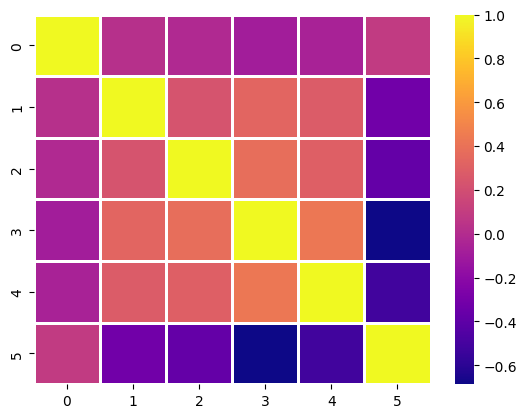

In [62]:
corr_mat=np.corrcoef(X_train,rowvar=False)
sns.heatmap(corr_mat,linewidth=1,cmap='plasma')
plt.show()

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
new_X_train = pd.DataFrame(X_train_scaled)
new_X_train.head()


,0,1,2,3,4,5
0,-1.344500,-1.145915,1.063384,-0.607285,-1.310932,0.320939
1,-0.435365,0.347561,1.833357,0.685451,0.512499,-1.085218
2,-1.506846,0.978140,2.264541,0.655387,0.766931,-0.822278
3,-0.565241,-0.117076,-0.784551,2.519332,1.572633,-1.988359
4,0.538709,-0.880408,-1.831714,-0.171363,1.403012,0.766794


In [66]:
new_X_test = pd.DataFrame(X_test_scaled)
new_X_test.head()

,0,1,2,3,4,5
0,0.441302,0.646256,0.201014,1.166469,0.385283,-0.833710
1,0.798462,-2.340696,0.201014,-0.562190,-0.462824,0.903980
2,-0.695118,1.044517,2.018150,-0.336713,0.597310,-1.931198
3,-0.760056,-0.946785,1.402172,0.986087,0.046040,-1.073786
4,1.610191,-0.814032,-1.184937,-0.892890,0.215662,0.435261


In [67]:
y_train2=np.asarray(y_train) 
y_train=pd.DataFrame(y_train2)
y_test2=np.asarray(y_test) 
y_test=pd.DataFrame(y_test2)

In [68]:
df_cat_std = pd.concat([new_X_train,y_train], axis=1)
df_cat_std.head()

,0,1,2,3,4,5,0,1
0,-1.344500,-1.145915,1.063384,-0.607285,-1.310932,0.320939,0,1
1,-0.435365,0.347561,1.833357,0.685451,0.512499,-1.085218,1,0
2,-1.506846,0.978140,2.264541,0.655387,0.766931,-0.822278,1,0
3,-0.565241,-0.117076,-0.784551,2.519332,1.572633,-1.988359,1,0
4,0.538709,-0.880408,-1.831714,-0.171363,1.403012,0.766794,0,1


In [69]:
df_test_std = pd.concat([new_X_test,y_test], axis=1)

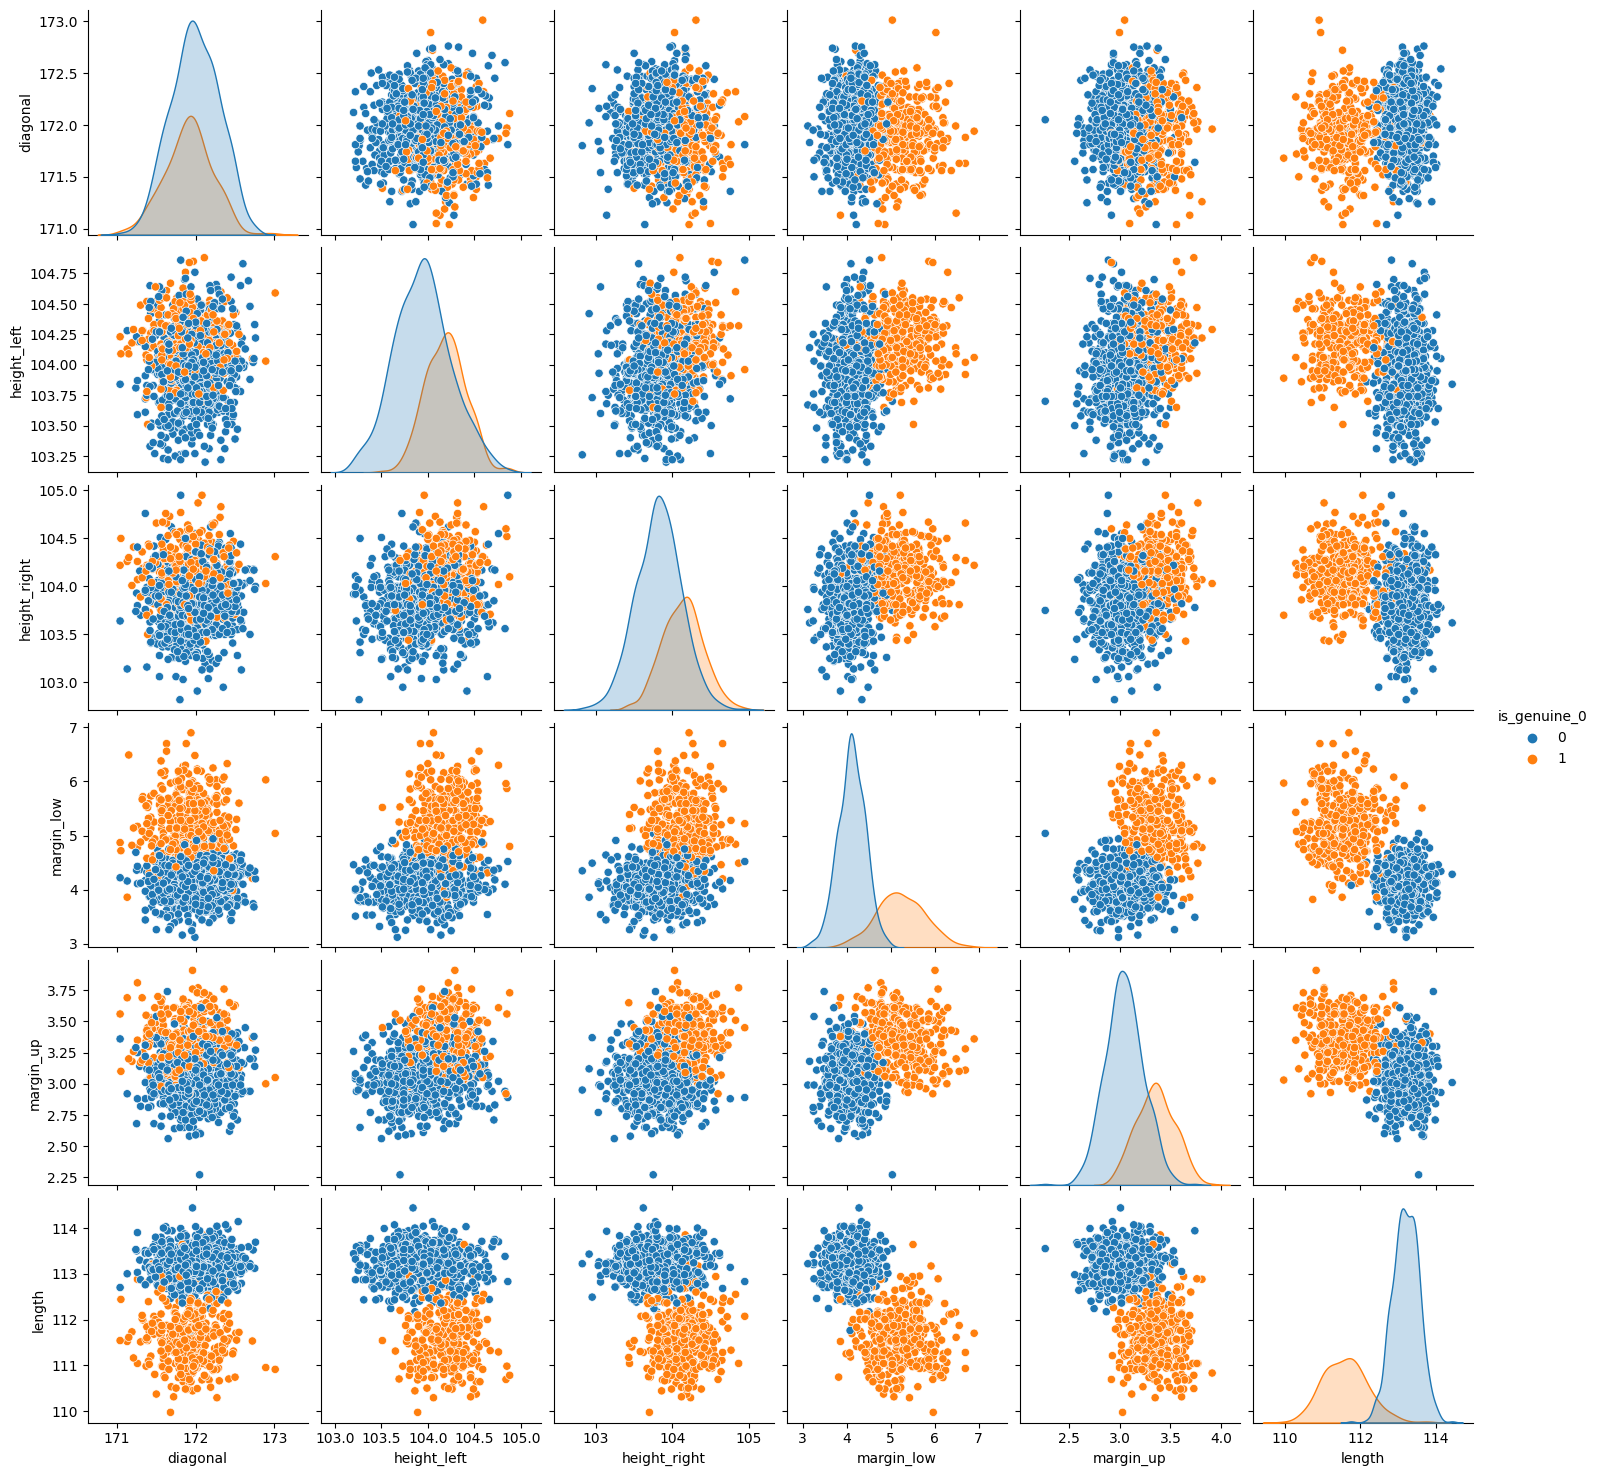

In [70]:
df_cat_std.columns = ['diagonal',	'height_left',	'height_right',	'margin_low',	'margin_up'	,'length',	'is_genuine_0','is_genuine_1'] 
sns.pairplot(df_cat.iloc[:,0:7], hue='is_genuine_0'); 
plt.show()

In [71]:
print(X_train)

      diagonal  height_left  height_right  margin_low  margin_up  length
391     171.55       103.68        104.27       4.080       2.84  112.95
1007    171.83       104.13        104.52       4.940       3.27  111.72
1056    171.50       104.32        104.66       4.920       3.33  111.95
1133    171.79       103.99        103.67       6.160       3.52  110.93
519     172.13       103.76        103.33       4.370       3.48  113.34
...        ...          ...           ...         ...        ...     ...
171     172.40       103.51        103.52       3.680       3.16  113.35
640     171.91       104.34        103.77       4.450       2.95  112.66
1052    172.13       104.09        104.16       5.450       3.38  111.79
338     171.69       104.30        103.94       4.270       2.96  113.43
241     171.83       104.14        104.06       4.236       3.02  112.36

[1050 rows x 6 columns]


In [72]:
print(y_train)

      0  1
0     0  1
1     1  0
2     1  0
3     1  0
4     0  1
...  .. ..
1045  0  1
1046  0  1
1047  1  0
1048  0  1
1049  0  1

[1050 rows x 2 columns]


In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']}

knn = KNeighborsClassifier()
gs = GridSearchCV(knn, param_grid, cv=10)#10 cross_validation

gs.fit(X_train, y_train)

print("Best Parameters : ", gs.best_params_)
print("Best Score : ", gs.best_score_)
print("Best Test Score : ", gs.score(X_test, y_test))

#최적의 하이퍼 파라메터로 Knn
the_best = KNeighborsClassifier(**gs.best_params_)
the_best.fit(X_train, y_train)

# 성능평가
y_pred = the_best.predict(X_test)
accuracy = the_best.score(X_test, y_test)
print("Accuracy: {:.3f}".format(accuracy))

Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
Best Score :  0.9923809523809524
Best Test Score :  0.9888888888888889
Accuracy: 0.989
